In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Definition of the non-Hermitian Hamiltonians and Unitaries

In [2]:
#Hamiltonian
def H_bright_nonH(Omega, Delta, V, Gamma):
    return np.array([[ 0, np.sqrt(2)*Omega/2, 0],[ np.sqrt(2)*np.conjugate(Omega)/2, -Delta-1j*Gamma, np.sqrt(2)*Omega/2],
                     [ 0, np.sqrt(2)*np.conjugate(Omega)/2, -2*Delta+V-1j*2*Gamma]])

def H_blockade_nonH(Omega, Delta, Gamma):
    return np.array([[ 0, np.sqrt(2)*Omega/2],[ np.sqrt(2)*np.conjugate(Omega)/2, -Delta-1j*Gamma]])

def H_single_nonH(Omega, Delta,Gamma):
    return np.array([[ 0, Omega/2],[ np.conjugate(Omega)/2, -Delta-1j*Gamma]])

#Unitary
def U_bright(Time, Omega, Delta, V, Gamma):
    Result = []
    for t in Time:
        Result.append(expm(-1j*H_bright_nonH(Omega, Delta, V,Gamma)*t))
    return np.array(Result)

def U_blockade(Time, Omega, Delta,Gamma):
    Result = []
    for t in Time:
        Result.append(expm(-1j*H_blockade_nonH(Omega, Delta,Gamma)*t))
    return np.array(Result)

def U_single(Time, Omega, Delta,Gamma):
    Result = []
    for t in Time:
        Result.append(expm(-1j*H_single_nonH(Omega, Delta,Gamma)*t))
    return np.array(Result)

#Hannes Picher sequence
def S_bright(Time, tau, Omega, Delta, V, phi,Gamma):
    Result = []
    for t in Time:
        if t<=tau:
            Result.append(expm(-1j*H_bright_nonH(Omega, Delta, V,Gamma)*t))
        else:
            Result.append(expm(-1j*H_bright_nonH(Omega*np.exp(-1j*phi), Delta, V,Gamma)*(t-tau))@expm(-1j*H_bright_nonH(Omega, Delta, V,Gamma)*tau))
    return np.array(Result)
    
    
def S_blockade(Time, tau, Omega, Delta, phi,Gamma):
    Result = []
    for t in Time:
        if t<=tau:
            Result.append(expm(-1j*H_blockade_nonH(Omega, Delta,Gamma)*t))
        else:
            Result.append(expm(-1j*H_blockade_nonH(Omega*np.exp(-1j*phi), Delta,Gamma)*(t-tau))@expm(-1j*H_blockade_nonH(Omega, Delta,Gamma)*tau))
    return np.array(Result)


def S_single(Time, tau, Omega, Delta, phi,Gamma):
    Result = []
    for t in Time:
        if t<=tau:
            Result.append(expm(-1j*H_single_nonH(Omega, Delta,Gamma)*t))
        else:
            Result.append(expm(-1j*H_single_nonH(Omega*np.exp(-1j*phi), Delta,Gamma)*(t-tau))@expm(-1j*H_single_nonH(Omega, Delta,Gamma)*tau))
    return np.array(Result)

In [3]:
#Pauli Operator
X = np.array([[0,1],[1,0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])


# Hannes Picher gate evolution for 30um waist situation

Delta = 2*pi* -0.75 MHz
Omega = 2*pi* 2.00 MHz
V = 197.00 MHz


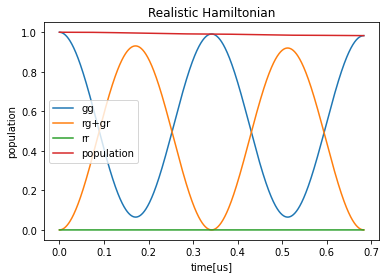

Fidelity:0.983
phase_blockade: -0.509pi


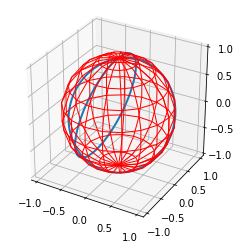

Delta = 2*pi* -0.75 MHz
Omega = 2*pi* 2.00 MHz
V = 197.00 MHz


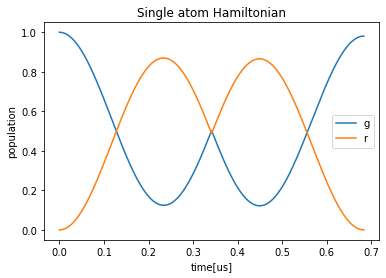

Fidelity: 0.981
2*phase_single: -1.516pi


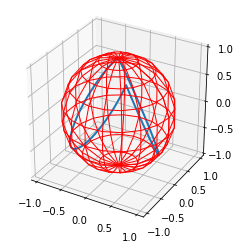

11 Fidelity:0.983
01 Fidelity: 0.981
accumulated relative phase: 1.006 pi
Bell Fidelity: 0.986


In [32]:
Omega = 2*np.pi*2e6 #current rabi freq with 30um waist
V = 2*np.pi*197e6 #interaction at 2.5um spacing
Delta = -0.377371*Omega
tau = 4.29268*1/Omega
phi = 3.90242
Gamma = 1/(37e-6) # 43us life time
# Gamma =0

Time = np.linspace(0, 2*tau,1000)

#bright
plt.plot(Time*1e6, np.abs(S_bright(Time,tau, Omega, Delta, V,phi,Gamma)[:,0,0])**2,label = "gg")
plt.plot(Time*1e6, np.abs(S_bright(Time,tau, Omega, Delta, V,phi,Gamma)[:,0,1])**2,label = "rg+gr")
plt.plot(Time*1e6, np.abs(S_bright(Time,tau, Omega, Delta, V,phi,Gamma)[:,0,2])**2,label = "rr")
plt.plot(Time*1e6, np.abs(S_bright(Time,tau, Omega, Delta, V,phi,Gamma)[:,0,0])**2+
         np.abs(S_bright(Time,tau, Omega, Delta, V,phi,Gamma)[:,0,1])**2+
         np.abs(S_bright(Time,tau, Omega, Delta, V,phi,Gamma)[:,0,2])**2,label = "population")
plt.xlabel("time[us]")
plt.ylabel("population")
plt.title("Realistic Hamiltonian")
plt.legend()
print("Delta = 2*pi* {:.2f} MHz".format(Delta*1e-6/2/np.pi))
print("Omega = 2*pi* {:.2f} MHz".format(Omega*1e-6/2/np.pi))
print("V = {:.2f} MHz".format(V*1e-6/2/np.pi))
plt.show()


X_bloch = []
Y_bloch = []
Z_bloch = []
Phi = S_bright(Time,tau, Omega, Delta, V,phi,Gamma)[:,0,:2]
phi_11 = np.imag(np.log(Phi[-1][0]))/np.pi
F11 = np.abs(Phi[-1][0])**2
print("Fidelity:{:.3f}".format(F11))
print("phase_blockade: {:.3f}pi".format(phi_11))
for i in range(len(Time)):
    X_bloch.append(np.real(np.array(np.conj(Phi[i]))@X@Phi[i].transpose()))
    Y_bloch.append(np.real(np.array(np.conj(Phi[i]))@Y@Phi[i].transpose()))
    Z_bloch.append(np.real(np.array(np.conj(Phi[i]))@Z@Phi[i].transpose()))
    

fig=plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.set_box_aspect(aspect=(1, 1, 1))
ax1.plot(X_bloch, Y_bloch, Z_bloch,
         linewidth=2)

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax1.plot_wireframe(x, y, z, color="r", linewidth=1)
plt.show()


# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax1.plot_wireframe(x, y, z, color="r", linewidth=1)
plt.show()

#single
plt.plot(Time*1e6, np.abs(S_single(Time,tau, Omega, Delta,phi,Gamma)[:,0,0])**2,label = "g")
plt.plot(Time*1e6, np.abs(S_single(Time,tau, Omega, Delta,phi,Gamma)[:,0,1])**2,label = "r")
plt.xlabel("time[us]")
plt.ylabel("population")
plt.title("Single atom Hamiltonian")
plt.legend()
print("Delta = 2*pi* {:.2f} MHz".format(Delta*1e-6/2/np.pi))
print("Omega = 2*pi* {:.2f} MHz".format(Omega*1e-6/2/np.pi))
print("V = {:.2f} MHz".format(V*1e-6/2/np.pi))
plt.show()


X_bloch = []
Y_bloch = []
Z_bloch = []
Phi = S_single(Time,tau, Omega, Delta,phi,Gamma)[:,0,:2]
phi_01 = np.imag(np.log(Phi[-1][0]))/np.pi
F01 = np.abs(Phi[-1][0])**2
print("Fidelity: {:.3f}".format(F01))
print("2*phase_single: {:.3f}pi".format(2*phi_01))

for i in range(len(Time)):
    X_bloch.append(np.real(np.array(np.conj(Phi[i]))@X@Phi[i].transpose()))
    Y_bloch.append(np.real(np.array(np.conj(Phi[i]))@Y@Phi[i].transpose()))
    Z_bloch.append(np.real(np.array(np.conj(Phi[i]))@Z@Phi[i].transpose()))
    

fig=plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.set_box_aspect(aspect=(1, 1, 1))
ax1.plot(X_bloch, Y_bloch, Z_bloch,
         linewidth=2)

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax1.plot_wireframe(x, y, z, color="r", linewidth=1)
plt.show()
phiDiff = phi_11-2*phi_01
print("11 Fidelity:{:.3f}".format(F11))
print("01 Fidelity: {:.3f}".format(F01))
print("accumulated relative phase: {:.3f} pi".format(phiDiff))
Fbell = (np.sqrt(F11)**2-2*(2*np.sqrt(F01)+1)*np.sqrt(F11)*np.cos(np.pi*phiDiff)+(2*np.sqrt(F01)+1)**2)/16
print("Bell Fidelity: {:.3f}".format(Fbell))

In [5]:
a=(1+1.56/2)*180
360-a

39.60000000000002

# Simmulation of experimental calibration (CZ gate)

Text(0, 0.5, 'final population')

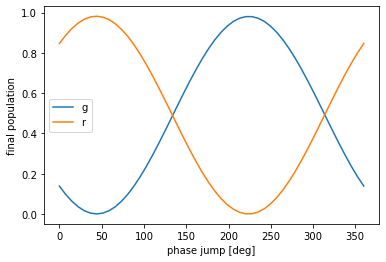

In [11]:
Phi = np.linspace(0,2*np.pi,50)
#single
popG = []
popR = []
for i in range(len(Phi)):
    popG.append(np.abs(S_single(Time,tau, Omega, Delta,Phi[i],Gamma)[-1,0,0])**2)
    popR.append(np.abs(S_single(Time,tau, Omega, Delta,Phi[i],Gamma)[-1,0,1])**2)

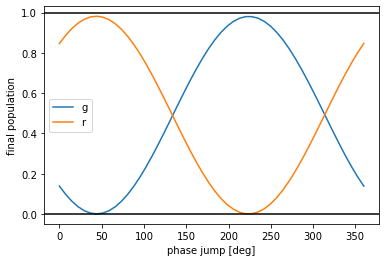

In [13]:
plt.plot(Phi/np.pi*180, popG,label = "g")
plt.plot(Phi/np.pi*180, popR,label = "r")
plt.xlabel('phase jump [deg]')
plt.legend()
plt.ylabel('final population')
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=1, color='k', linestyle='-')

In [20]:
phi/np.pi*180

223.59219588744273

In [23]:
Phi = np.linspace(0,2*np.pi,50)
#single
popGG = []

for i in range(len(Phi)):
    popGG.append(np.abs(S_bright(Time,tau, Omega, Delta, V,Phi[i],Gamma)[-1,0,0])**2)

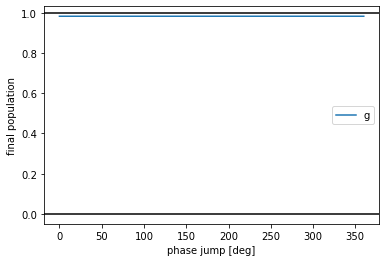

In [24]:
plt.plot(Phi/np.pi*180, popGG,label = "g")
plt.xlabel('phase jump [deg]')
plt.legend()
plt.ylabel('final population')
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=1, color='k', linestyle='-')

# Bell state generation

In [30]:
PsiS = S_single(Time,tau, Omega, Delta,phi,Gamma)[-1,0,:]
print(PsiS)
PsiD = S_bright(Time,tau, Omega, Delta, V,phi,Gamma)[-1,0,:]
print(PsiD)

[-7.17183642e-01-6.82774572e-01j -5.33299898e-04+2.33115143e-04j]
[-2.86425896e-02-9.90983645e-01j  4.03858540e-05+2.19516394e-03j
  2.31358132e-05+4.29456493e-05j]


In [31]:
PsiS[0],PsiD[0]

((-0.7171836417978397-0.682774572442743j),
 (-0.028642589618199946-0.9909836454950903j))